In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('housing.csv')

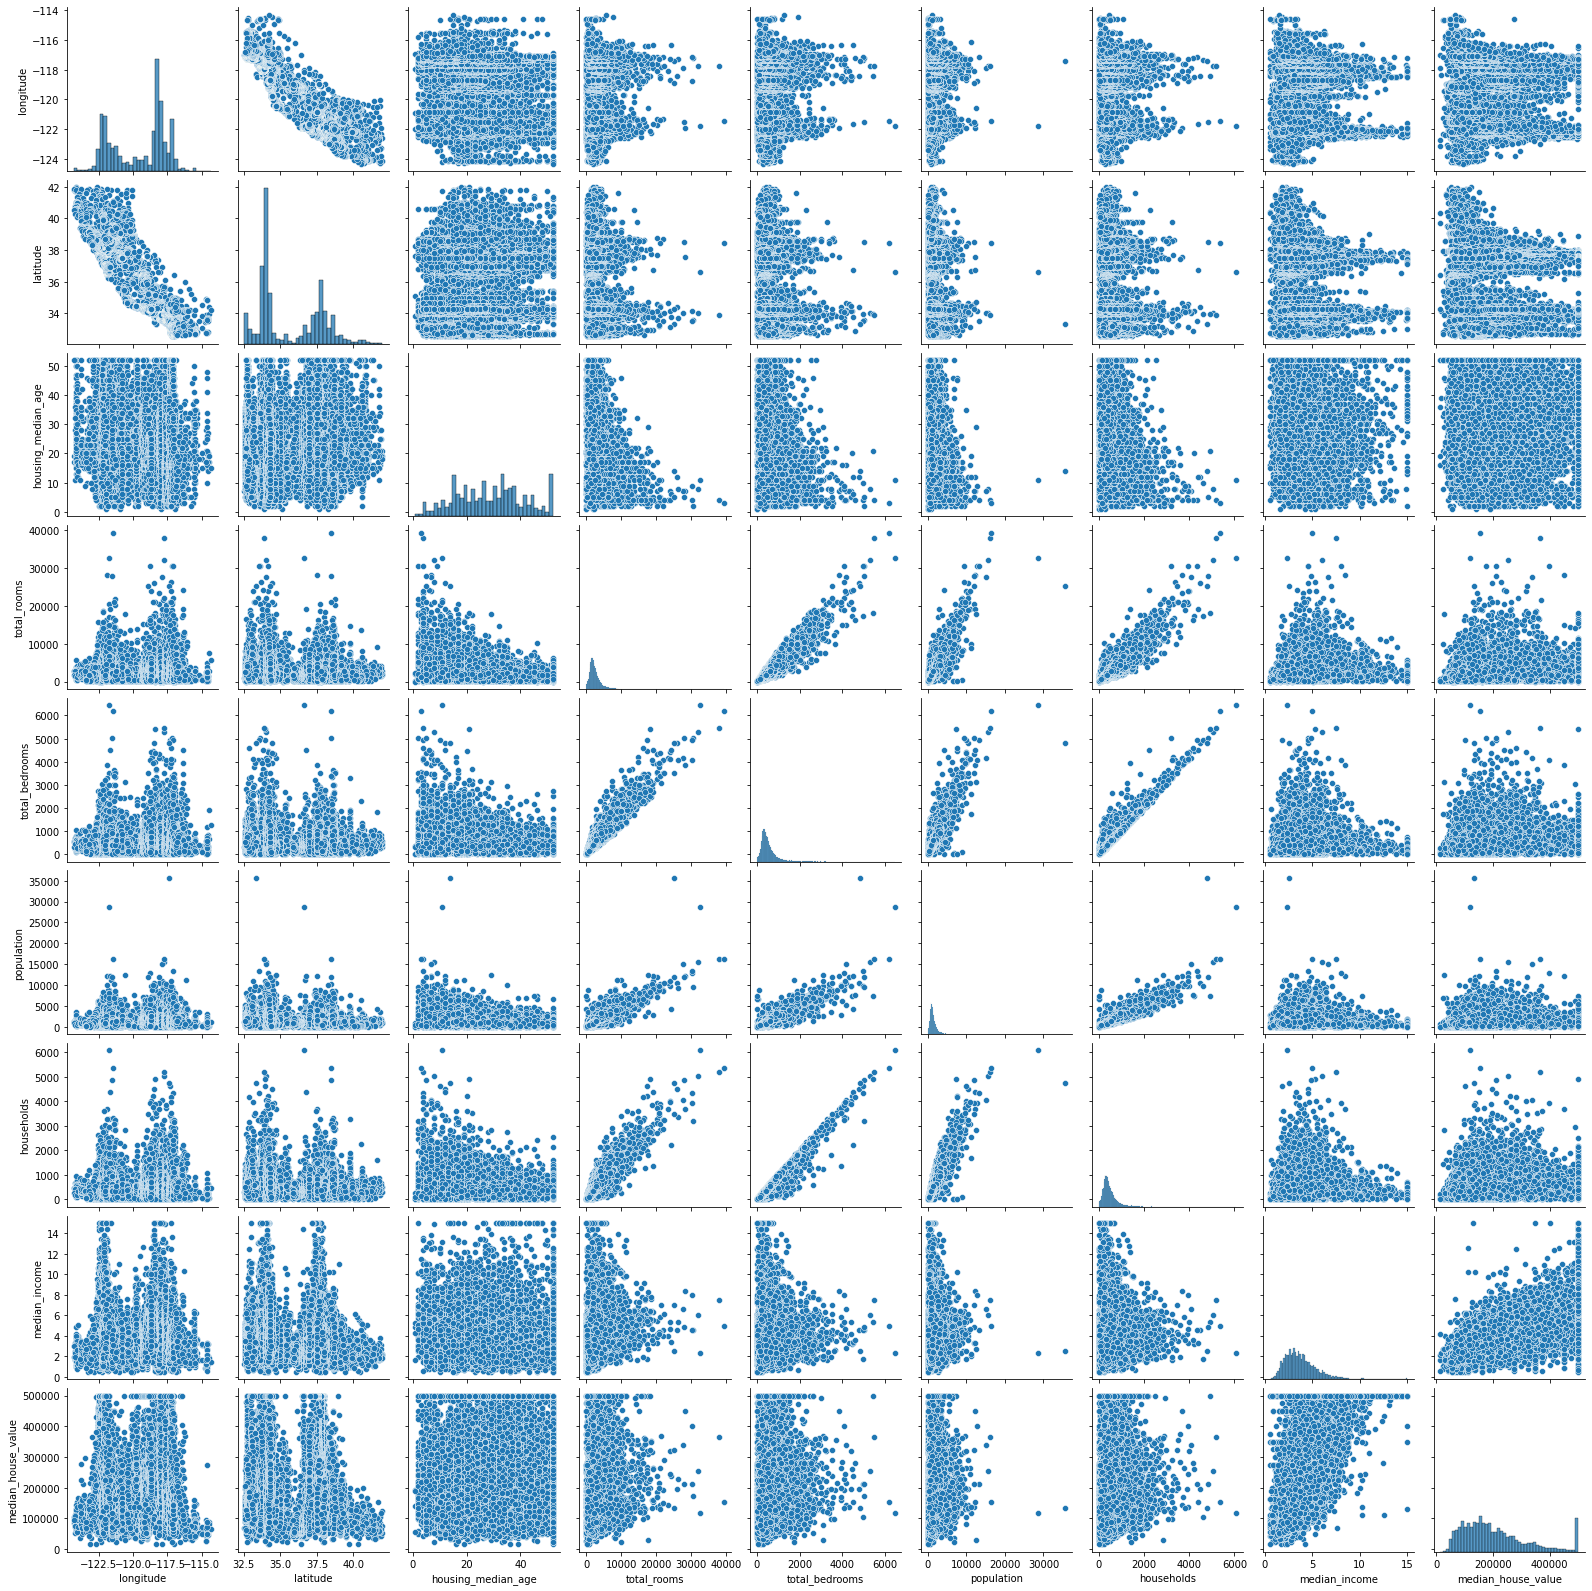

In [36]:
sb.pairplot(df)

In [37]:
for i in df.columns:
    try:
        if df[i].min()<=0:
            print(i)
    except:
        pass
        
        

longitude


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
df.longitude.min()

-124.35

In [40]:
def log_transform(x):
    if df[x].min()<=0:
        f=-df[x].min()+1
        df[x]+=f
    df[x]=np.log(df[x])
       
    
    


In [41]:
for i in df.columns:
    try:
        log_transform(i)
    except:
        pass

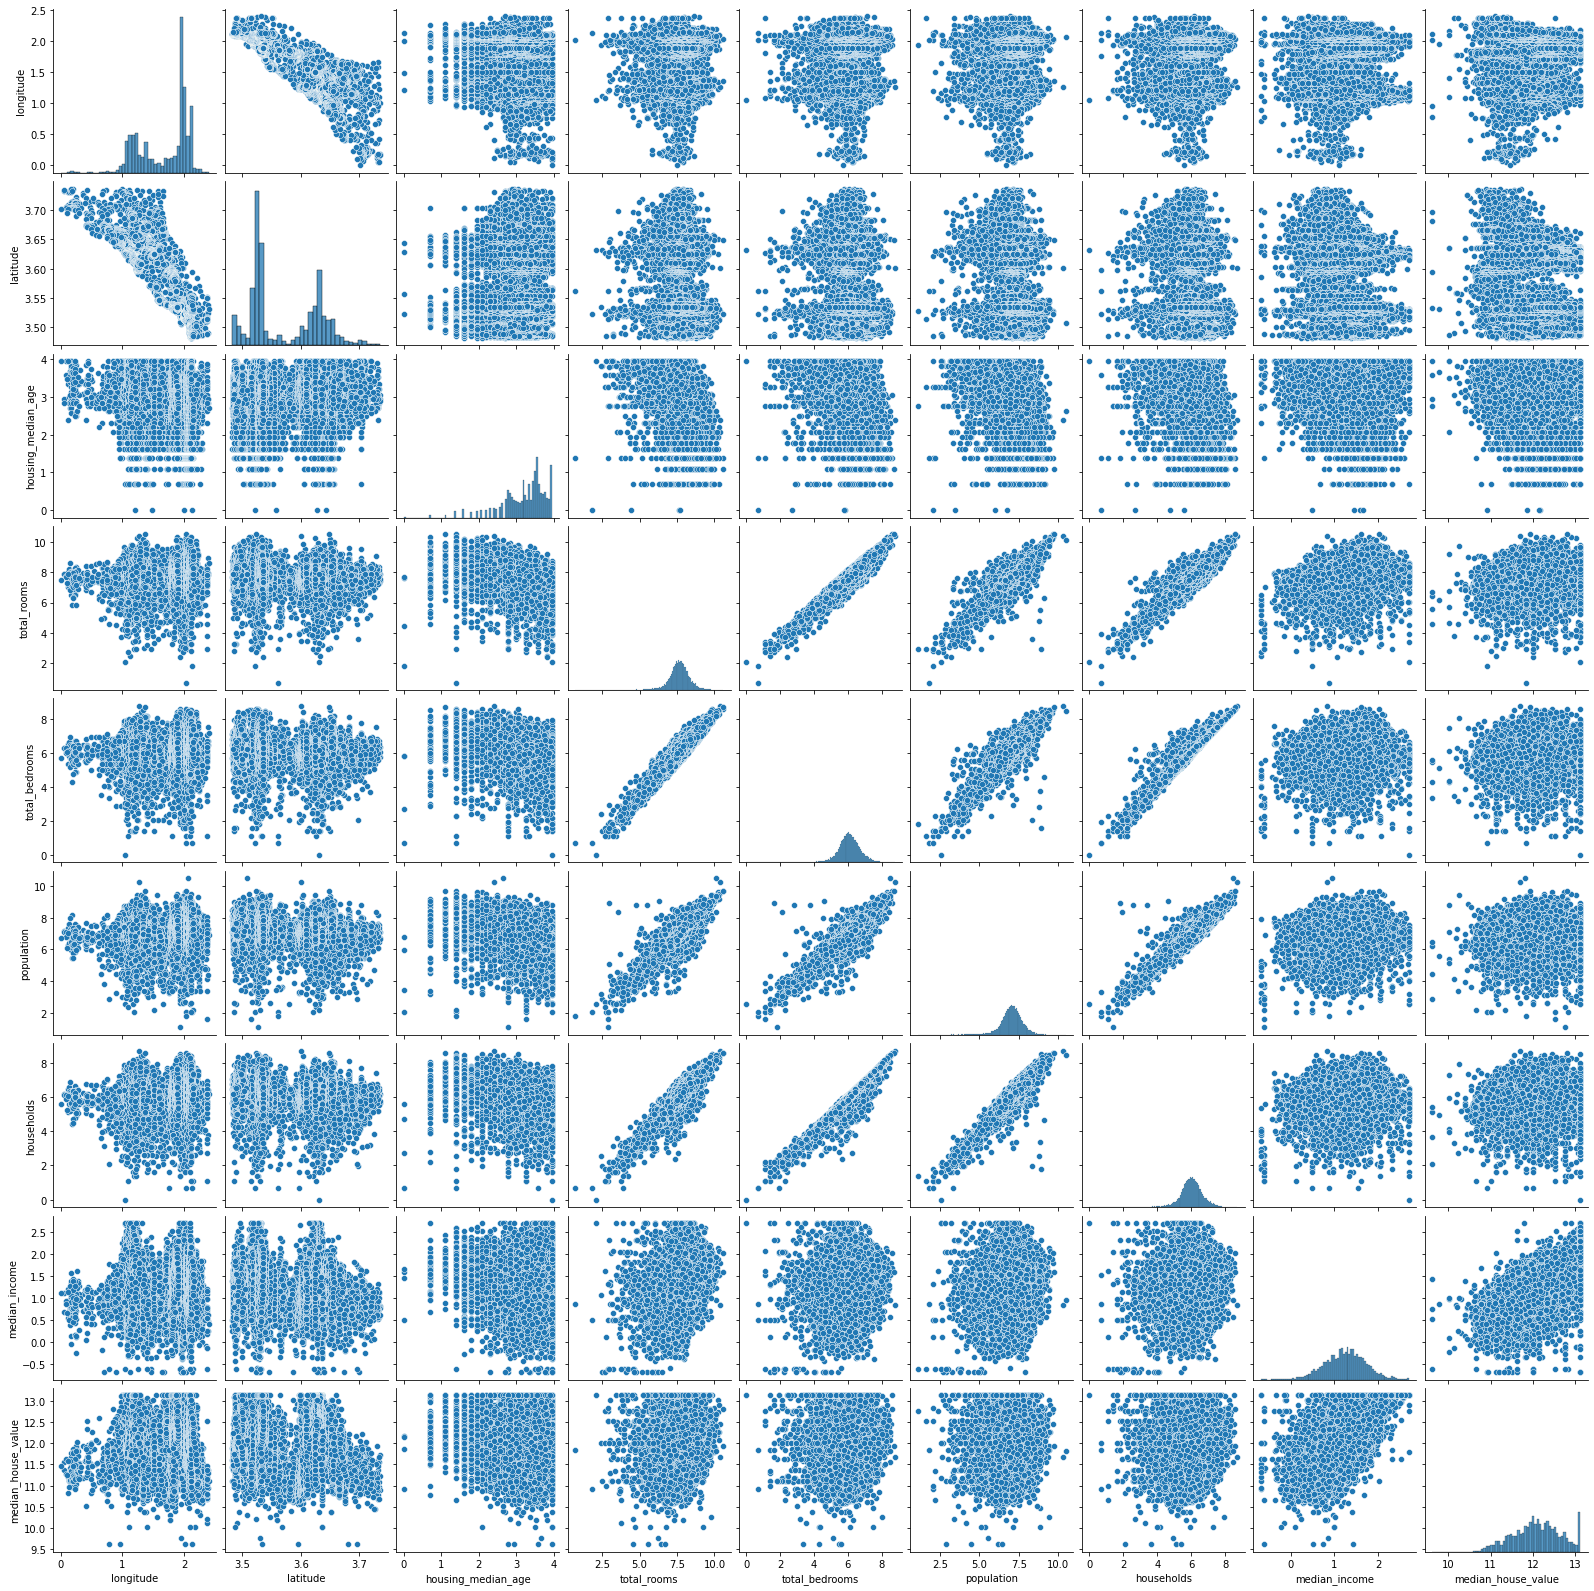

In [42]:
sb.pairplot(df)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

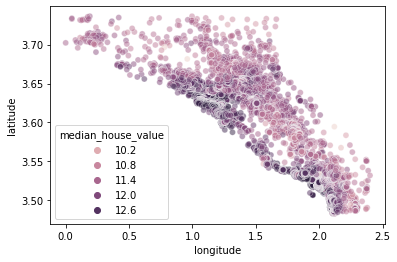

In [43]:
sb.scatterplot(x=df.longitude,y=df.latitude,hue=df.median_house_value,alpha=0.5)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

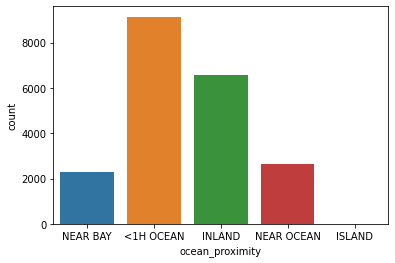

In [44]:
print(df.ocean_proximity.value_counts())
sb.countplot(x=df.ocean_proximity)

In [45]:
i = df[df.ocean_proximity == 'ISLAND'].index
df.drop(i,inplace=True)

<AxesSubplot:xlabel='ocean_proximity', ylabel='total_bedrooms'>

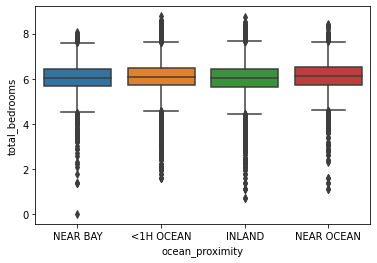

In [46]:
sb.boxplot(x=df.ocean_proximity, y=df.total_bedrooms)

In [47]:
df.fillna(df.total_bedrooms.median(),inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20635 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.2+ MB


In [53]:
d= pd.get_dummies(df.ocean_proximity,drop_first=True)
df1 = pd.concat([df,d],axis=1).drop('ocean_proximity',axis=1)
df1.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

x=df1.drop('median_house_value',axis=1).values
y=df1.median_house_value.values

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75)

In [60]:
xtrain.shape, xtest.shape

((15476, 11), (5159, 11))

In [61]:
lr=LinearRegression()
rfr=RandomForestRegressor()

In [62]:
lr.fit(xtrain, ytrain)
rfr.fit(xtrain, ytrain)
lr_pred= lr.predict(xtest)
rfr_pred= rfr.predict(xtest)

In [65]:
from sklearn.metrics import mean_absolute_error, r2_score

print(mean_absolute_error(np.exp(lr_pred),np.exp(ytest)))
print(mean_absolute_error(np.exp(rfr_pred),np.exp(ytest)))


48100.10269037391
31056.066212870326


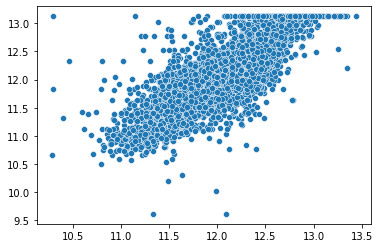

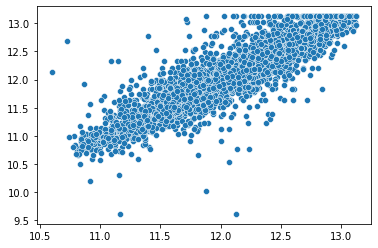

In [67]:
sb.scatterplot(x=lr_pred,y=ytest)
plt.show()
sb.scatterplot(x=rfr_pred,y=ytest)
plt.show()

<AxesSubplot:>

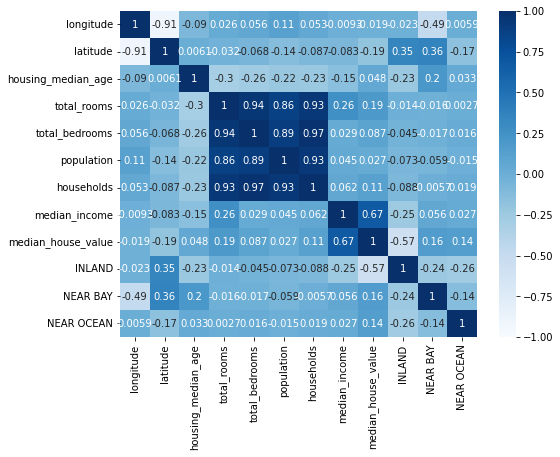

In [69]:
plt.figure(figsize=(8,6))
sb.heatmap(df1.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1)